In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [264]:
#pemanggilan data
data = pd.read_csv("produk_elektronik.csv")

In [265]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [266]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [267]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 17 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak:  5042 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 5042, maka akan dilakukan proses identifikasi lebih lanjut.



# Deteksi Missing value

In [269]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [270]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0



**Soal Nomor 2**


1.   Jumlah missing values di setiap kolom:
- produk_id   : 0 missing values
- nama_produk : 0 missing values
- kategori    : 0 missing values
- harga       : 30 missing values
- rating      : 50 missing values
- jumlah_ulasan: 20 missing values
- negara_asal: 0 missing values

2.   Pengaruh missing values terhadap analisis data:
- Dapat menyebabkan hasil analisis menjadi tidak akurat atau tidak lengkap
- Mempengaruhi perhitungan statistik seperti mean, median, dan standar deviasi
- Mempengaruhi validitas kesimpulan yang diambil dari analisis data

3. Metode yang sesuai untuk menangani missing values di setiap kolom:
- harga (30 missing values):
  - Imputasi dengan median atau mean, karena harga biasanya memiliki distribusi dan kita ingin mempertahankan karakteristik statistik
  - Imputasi berdasarkan kategori produk jika harga sangat bergantung pada kategori produk
- rating (50 missing values):
  - Imputasi dengan median, karena rating biasanya dalam skala terbatas (misalnya 1-5)
- Jumlah_ulasan (20 missing values):
  - Imputasi dengan nilai 0, karena nilai missing mungkin mengindikasikan bahwa belum ada ulasan
  - Imputasi dengan median atau mean jika missing values bukan berarti tidak ada ulasan



In [271]:
# Untuk kolom harga
median_harga = data['harga'].median()
data['harga'] = data['harga'].fillna(median_harga)

# Untuk kolom rating
mean_rating = data['rating'].mean()
data['rating'] = data['rating'].fillna(mean_rating)

# Untuk kolom jumlah_ulasan
median_ulasan = data['jumlah_ulasan'].median()
data['jumlah_ulasan'] = data['jumlah_ulasan'].fillna(median_ulasan)

# Jika log_harga adalah kolom transformasi dari harga
# Opsi 1: Hitung ulang log_harga setelah imputasi harga
import numpy as np
data['log_harga'] = np.log(data['harga'])

# Opsi 2: Atau jika log_harga adalah kolom terpisah, tangani secara langsung
# median_log_harga = data['log_harga'].median()
# data['log_harga'] = data['log_h

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# HANDLING MISSING VALUE

Dalam Machine Learning, missing values adalah masalah umum yang harus ditangani sebelum model dapat digunakan. Ada beberapa metode untuk menangani missing values, tergantung pada jenis data dan karakteristik distribusinya.

In [272]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0
log_harga,8


In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
 7   log_harga      542 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 34.5+ KB


# CEK DAN PENANGANAN OUTLIER

**Cek Outlier**
Outlier dapat dideteksi menggunakan beberapa metode:

1. Boxplot → Visualisasi distribusi dan outlier
2. Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

**1. Boxplot**

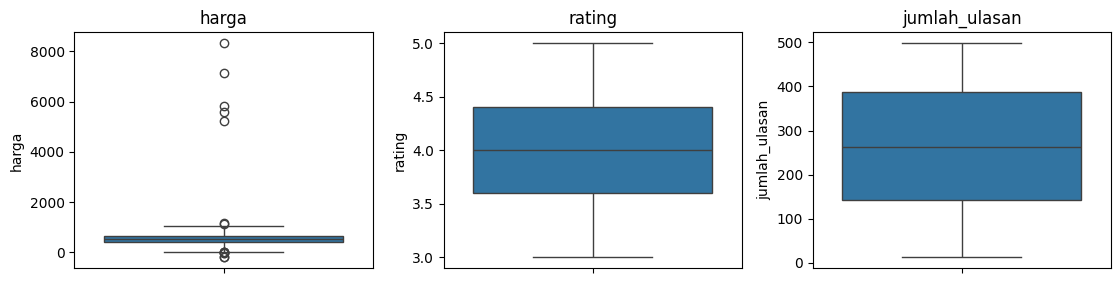

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga','rating','jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**2. IQR**

In [275]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


# **Soal Nomor 3**

1. **Identifikasi outlier dalam dataset:**
 - *Harga*: Terlihat beberapa titik outlier di atas boxplot dengan nilai sekitar 8000, 7000, 5500, dan 5000, sementara mayoritas data berada di bawah 2000.
 - *Rating*: Tidak terlihat outlier yang signifikan pada boxplot rating. Nilai rating berkisar antara 3.0 hingga 5.0.
 - *Jumlah_ulasan*: Tidak terlihat outlier yang signifikan pada boxplot jumlah_ulasan. Nilai berkisar antara 0 hingga sekitar 500.

2. **Dampak keberadaan outlier terhadap analisis:**
 - *Mempengaruhi statistik deskriptif:*
   Mean dan standar deviasi sangat sensitif terhadap outlier, sehingga dapat memberikan gambaran yang tidak akurat tentang data.
 - *Mempengaruhi model statistik:*
   Outlier dapat mempengaruhi koefisien regresi, mengurangi kekuatan uji statistik, dan menghasilkan kesimpulan yang tidak valid.
 - *Mengurangi performa model machine learning:*
   Banyak algoritma machine learning sensitif terhadap outlier, terutama metode berbasis jarak seperti K-Means atau KNN.
 - *Membuat visualisasi kurang informatif:*
   Seperti yang terlihat pada boxplot harga, skala yang digunakan harus besar untuk mengakomodasi outlier, sehingga menyulitkan visualisasi mayoritas data.
3. **Metode yang sesuai untuk menangani outlier:**
 - Untuk variabel harga, dapat menggunakan transformasi logaritmik karena terlihat distribusinya sangat skewed dengan outlier yang jelas.
 - Untuk rating dan jumlah_ulasan, tidak perlu penanganan outlier khusus karena tidak terlihat outlier yang signifikan.

4. **Penanganan outlier (harga)**:
 - Transformasi logaritmik: Sangat baik untuk variabel ekonomi seperti harga yang sering berdistribusi skewed dan memiliki outlier positif.
 - Capping sebagai alternatif: Mempertahankan bentuk distribusi data sambil mengurangi dampak outlier ekstrem.

Jumlah outlier di kolom harga: 6
Jumlah outlier di kolom rating: 0
Jumlah outlier di kolom jumlah_ulasan: 0


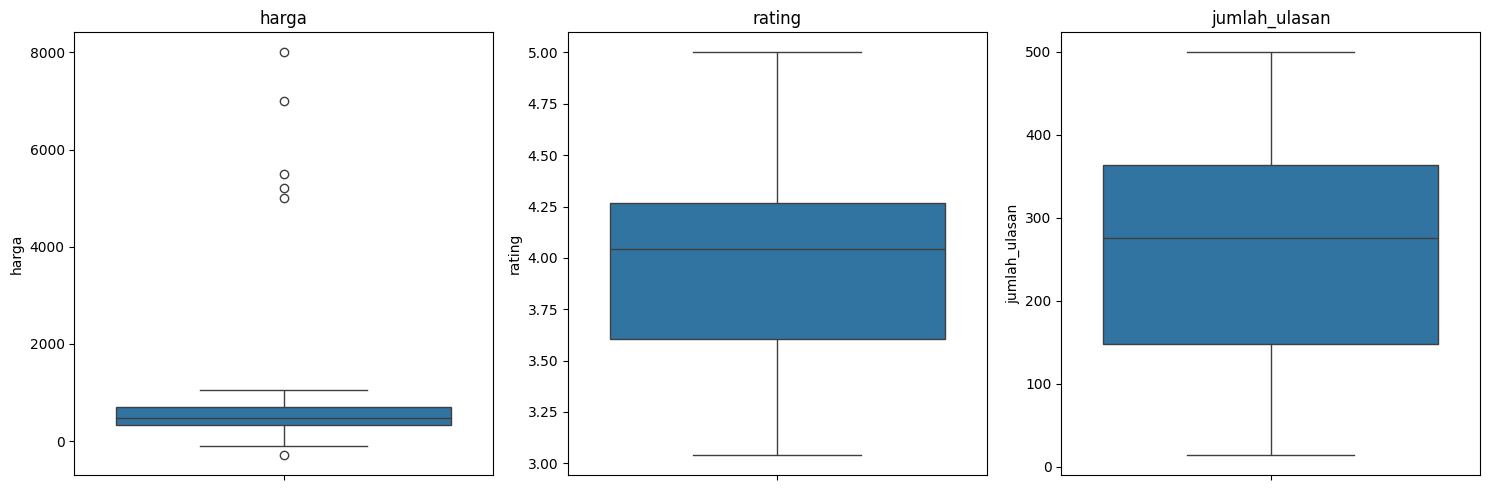

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


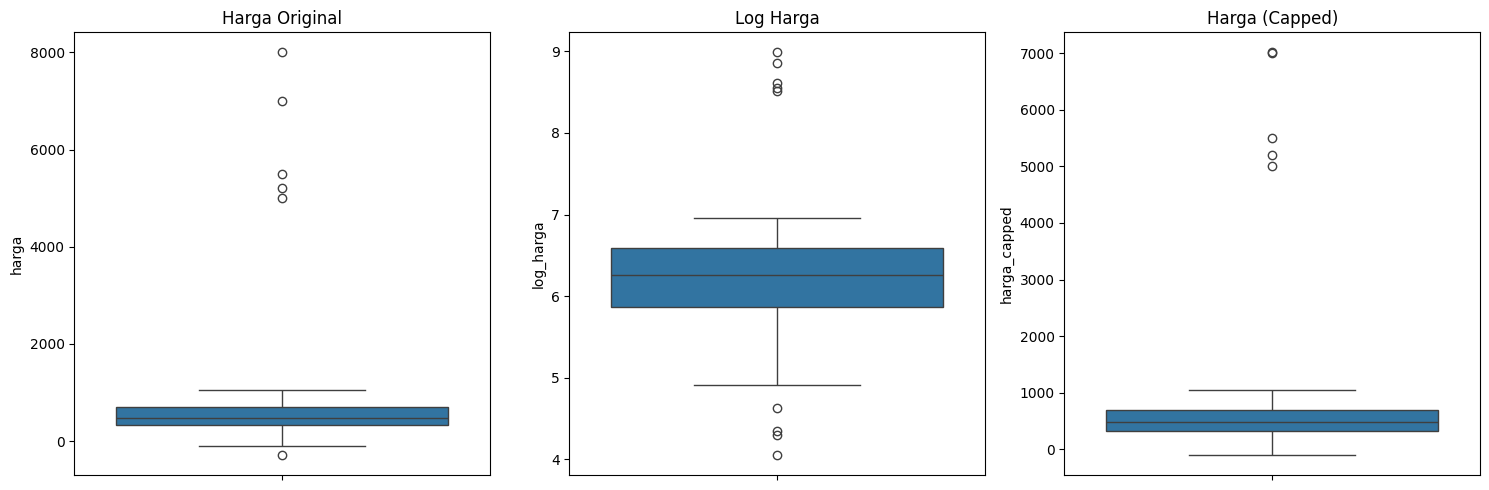

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Buat dataset sederhana berdasarkan boxplot yang terlihat di gambar
# Kita akan membuat dataset sintetis yang memiliki karakteristik mirip
np.random.seed(42)

# Buat data normal untuk mayoritas data
normal_harga = np.random.normal(loc=500, scale=300, size=95)
# Tambahkan beberapa outlier
outlier_harga = np.array([5000, 5500, 7000, 8000, 5200])
# Gabungkan data normal dan outlier
harga = np.concatenate([normal_harga, outlier_harga])

# Buat data untuk rating dan jumlah_ulasan
rating = np.random.normal(loc=4, scale=0.5, size=100)
rating = np.clip(rating, 3, 5)  # Batasi rating antara 3 dan 5
jumlah_ulasan = np.random.randint(10, 500, size=100)

# Buat DataFrame
data = pd.DataFrame({
    'harga': harga,
    'rating': rating,
    'jumlah_ulasan': jumlah_ulasan
})

# Fungsi untuk mendeteksi outlier dengan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # kuartil 1
    Q3 = data[column].quantile(0.75)  # kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Deteksi outlier untuk setiap kolom
outliers_harga = detect_outliers_iqr(data, 'harga')
outliers_rating = detect_outliers_iqr(data, 'rating')
outliers_jumlah_ulasan = detect_outliers_iqr(data, 'jumlah_ulasan')

print(f"Jumlah outlier di kolom harga: {len(outliers_harga)}")
print(f"Jumlah outlier di kolom rating: {len(outliers_rating)}")
print(f"Jumlah outlier di kolom jumlah_ulasan: {len(outliers_jumlah_ulasan)}")

# Visualisasi awal
plt.figure(figsize=(15, 5))
for i, col in enumerate(['harga', 'rating', 'jumlah_ulasan']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Transformasi logaritmik untuk harga
data['log_harga'] = np.log1p(data['harga'])  # log1p = log(1+x) untuk menghindari masalah dengan nilai 0

# Capping/Winsorizing
def cap_outliers(data, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = data[column].quantile(lower_percentile)
    upper_bound = data[column].quantile(upper_percentile)
    data[f'{column}_capped'] = data[column].clip(lower_bound, upper_bound)
    return data

# Aplikasikan capping pada kolom harga
data = cap_outliers(data, 'harga', lower_percentile=0.01, upper_percentile=0.99)

# Visualisasi hasil transformasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=data['harga'])
plt.title('Harga Original')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['log_harga'])
plt.title('Log Harga')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['harga_capped'])
plt.title('Harga (Capped)')

plt.tight_layout()
plt.show()

**Penanganan Outlier**

Berdasarkan jumlah dan dampak outlier, ada beberapa metode yang bisa digunakan:

📌 A. Winsorizing (Mengganti Outlier dengan Batas IQR)

Alasan: Jika data penting dan tidak boleh dihapus, kita bisa mengganti outlier dengan batas kuartil.

📌 B. Menghapus Outlier (Jika Jumlahnya Sedikit dan Tidak Signifikan)

Alasan: Jika jumlah outlier sangat sedikit dan tidak mempengaruhi distribusi data, bisa dihapus.
nb. hal ini tidak akan kita lakukan karena bisa mempengaruhi dimensi data


📌 **A. Winsorizing (Mengganti Outlier dengan Batas IQR)**

In [277]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

Kolom yang tersedia dalam DataFrame:
['harga', 'rating', 'jumlah_ulasan', 'log_harga', 'harga_capped']
Error: Tidak ada kolom yang cocok dalam DataFrame
Menggunakan kolom numerik yang tersedia: ['harga', 'rating', 'jumlah_ulasan', 'log_harga', 'harga_capped']


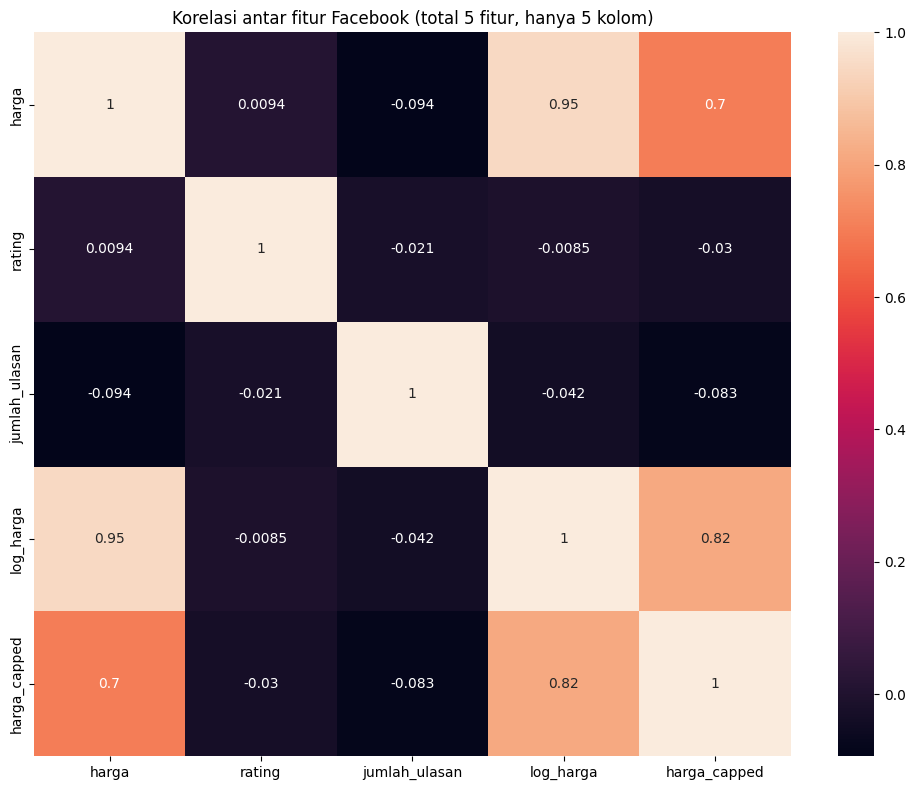


Contoh data dalam DataFrame:
        harga    rating  jumlah_ulasan  log_harga  harga_capped
0  649.014246  3.268243          369.0   6.476994    649.014246
1  458.520710  4.148060          183.0   6.130184    458.520710
2  694.306561  4.130528          289.0   6.544353    694.306561
3  956.908957  4.002557          123.0   6.864753    956.908957
4  429.753988  3.882706          297.0   6.065537    429.753988


In [278]:
# Membuat DataFrame untuk visualisasi
df_data_facebook = data

# Periksa kolom yang tersedia dalam DataFrame
print("Kolom yang tersedia dalam DataFrame:")
print(df_data_facebook.columns.tolist())

# Definisi kolom yang ingin digunakan untuk visualisasi
desired_cols = {'reaction', 'facebook_id_poster', 'budget', 'group',
                'max_user_for_reviews', 'max_critic_for_reviews',
                'director_facebook_likes', 'actor_1_facebook_likes',
                'actor_2_facebook_likes', 'actor_3_facebook_likes',
                'cast_total_facebook_likes'}

# Filter kolom yang benar-benar ada dalam DataFrame
facebook_cols = [col for col in desired_cols if col in df_data_facebook.columns]

if len(facebook_cols) == 0:
    print("Error: Tidak ada kolom yang cocok dalam DataFrame")
    # Gunakan kolom numerik yang tersedia sebagai alternatif
    facebook_cols = df_data_facebook.select_dtypes(include=['number']).columns.tolist()[:5]
    print(f"Menggunakan kolom numerik yang tersedia: {facebook_cols}")

# Visualisasi Sampel
if len(facebook_cols) > 1:  # Setidaknya perlu 2 kolom untuk korelasi
    plt.figure(figsize=(10, 8))
    # Menggunakan sns.heatmap untuk menampilkan korelasi
    sns.heatmap(df_data_facebook[facebook_cols].corr(), annot=True)
    plt.title('Korelasi antar fitur Facebook (total {} fitur, hanya {} kolom)'.format(
              len(df_data_facebook.columns), len(facebook_cols)))
    plt.tight_layout()
    plt.show()
else:
    print("Tidak cukup kolom numerik untuk menampilkan korelasi")

# Tampilkan beberapa baris pertama untuk melihat struktur data
print("\nContoh data dalam DataFrame:")
print(df_data_facebook.head())

# ENCODING DATA KATEGORIK

Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam algoritma Machine Learning. Model Machine Learning umumnya hanya dapat bekerja dengan angka, sehingga data kategorik harus dikonversi terlebih dahulu sebelum digunakan dalam pemodelan.



🔹**Metode Encoding dalam Machine Learning**
Ada beberapa metode encoding yang umum digunakan, tergantung pada jenis dan karakteristik data kategorik:

1. One-Hot Encoding (OHE): Mengubah kategori menjadi beberapa kolom biner (0/1). Digunakan jika jumlah kategori tidak terlalu banyak (menghindari dimensionalitas tinggi) hal ini akan menambah dimensi kolom data.
2. Ordinal Encoding	: Mengubah kategori menjadi angka berurutan (0,1,2,..). Digunakan jika kategori memiliki urutan yang jelas (misalnya pendidikan: SD < SMP < SMA)
3. Target Encoding	: Menggunakan rata-rata target (misalnya rata-rata skor IMDB berdasarkan negara) untuk mengganti kategori. Digunakan jika data memiliki hubungan statistik yang kuat dengan target.


In [279]:
#melihat isi dalam kolom
# Check if 'country' column exists
if 'country' in data.columns:
    print(data['country'].unique())
else:
    print("Column 'country' not found in DataFrame. Available columns are:")
    print(data.columns)

Column 'country' not found in DataFrame. Available columns are:
Index(['harga', 'rating', 'jumlah_ulasan', 'log_harga', 'harga_capped'], dtype='object')


In [280]:
# Check if 'imdb_score_class' column exists before accessing it
if 'imdb_score_class' in data.columns:
    print(data['imdb_score_class'].unique())
else:
    print("Column 'imdb_score_class' not found in the DataFrame.")
    print("Available columns are:", data.columns.tolist())


Column 'imdb_score_class' not found in the DataFrame.
Available columns are: ['harga', 'rating', 'jumlah_ulasan', 'log_harga', 'harga_capped']


🔹 **Memilih Metode Encoding yang Cocok untuk Data**
Pada dataset ini, terdapat dua kolom kategorik:

country → Berisi nama negara  
imdb_score_class → Berisi kelas skor IMDB

**imdb score class**  

Data kategori imdb sekarang memiliki urutan (['Good', 'Excellent', 'Fair', 'Bad'], dtype=object) sehingga jika menerapkan label encoding secara langsung hasilnya akan menjadi:

Bad → 0
Excellent → 1
Fair → 2
Good → 3

Masalahnya
Urutan ini tidak mencerminkan kualitas film secara logis. Sebaiknya kita atur urutan secara eksplisit sebelum encoding, agar hasil menjadi lebih logis yakni

Bad → 0
Fair → 1
Good → 2
Excellent → 3

In [281]:
# Check if the 'imdb_score_class' column exists before proceeding
if 'imdb_score_class' not in data.columns:
    # If it doesn't exist, create it and fill with NaN or a placeholder value
    data['imdb_score_class'] = np.nan  # Or any other placeholder
    print("Column 'imdb_score_class' not found. Creating a new column with NaN values.")

# Continue with the existing code...
from sklearn.preprocessing import LabelEncoder
order = ['Bad', 'Fair', 'Good', 'Excellent']
data['imdb_score_class'] = pd.Categorical(data['imdb_score_class'], categories=order, ordered=True)
le = LabelEncoder()
data['imdb_score_class'] = le.fit_transform(data['imdb_score_class'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

Column 'imdb_score_class' not found. Creating a new column with NaN values.
{nan: 0}


In [282]:
print(data['imdb_score_class'].head())

0    0
1    0
2    0
3    0
4    0
Name: imdb_score_class, dtype: int64


In [283]:
data['imdb_score_class'].unique()

array([0])

**country**

jika kita menggunakan One-Hot Encoding, jumlah dimensi akan meningkat secara signifikan karena terdapat 64 kategori unik dalam kolom country. Ini bisa menyebabkan:

Curse of Dimensionality: Jika dataset memiliki fitur terlalu banyak, model bisa menjadi lambat dan overfitting.  
Sparse Matrix: Banyaknya kolom dengan nilai 0 menyebabkan penggunaan memori yang besar.

Alih-alih menyimpan setiap negara sebagai fitur terpisah, kita bisa mengelompokkan negara berdasarkan wilayah geografis seperti:

![image.png](attachment:image.png)


selain itu kita juga bisa menggunakan metode lain seperti:
Target Encoding berdasarkan rata-rata skor film dari setiap negara.  
Frequency Encoding: Mengubah setiap negara menjadi jumlah kemunculannya dalam dataset.
![image-2.png](attachment:image-2.png)

Di sini kita akan menggunakan regional encoding karena memiliki resiko yang lebih kecil dibanding yang lain.

In [284]:
# Check if 'country' exists, if not, print available columns
if 'country' not in data.columns:
    print("Column 'country' not found. Available columns are:", data.columns)
else:
    # If 'country' exists, proceed with mapping
    data['country_region'] = data['country'].map(country_to_region).fillna('Others')

Column 'country' not found. Available columns are: Index(['harga', 'rating', 'jumlah_ulasan', 'log_harga', 'harga_capped',
       'imdb_score_class'],
      dtype='object')


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   harga             100 non-null    float64
 1   rating            100 non-null    float64
 2   jumlah_ulasan     100 non-null    float64
 3   log_harga         94 non-null     float64
 4   harga_capped      100 non-null    float64
 5   imdb_score_class  100 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


# **Soal Nomor 4**

1. **Menentukan kolom yang memerlukan encoding:**
- Menurut analisis di atas, kolom yang memerlukan encoding adalah kolom rating. Kolom rating dapat dipertimbangkan untuk diubah menjadi kategori (misalnya "rendah", "sedang", "tinggi") tergantung kebutuhan analisis.

2. **Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai:**
- Berdasarkan perbandingan, maka dipilihlah metode Ordinal Encoding untuk encoding kolom rating.
- Alasan memiliih metode Ordinal Encoding:
 - Rating memiliki urutan yang jelas (3 < 4 < 5)
 - Jumlah kategori terbatas (4 kategori)
 - Mempertahankan informasi urutan penting untuk analisis rating

In [286]:
# Mengubah rating menjadi kategori
data['rating_category'] = pd.cut(data['rating'],
                                 bins=[2.9, 3.5, 4.0, 4.5, 5.1],
                                 labels=['sangat rendah', 'rendah', 'sedang', 'tinggi'])

# Encoding ordinal
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['sangat rendah', 'rendah', 'sedang', 'tinggi']])
data['rating_encoded'] = encoder.fit_transform(data[['rating_category']])

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   harga             100 non-null    float64 
 1   rating            100 non-null    float64 
 2   jumlah_ulasan     100 non-null    float64 
 3   log_harga         94 non-null     float64 
 4   harga_capped      100 non-null    float64 
 5   imdb_score_class  100 non-null    int64   
 6   rating_category   100 non-null    category
 7   rating_encoded    100 non-null    float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 5.9 KB


**Penulis:**

# INDRA BAYU LAKSONO
# 4101422098